In [2]:
import seaborn as sns
sns.set(
    font='sans-serif', 
    style='white', 
    font_scale=1.4, 
    palette='muted',
    rc = {
    "lines.linewidth": 2, 
    "lines.markersize":6,
   }
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Varying delta

In [3]:
dbscan = pd.read_csv("results/kmeans6000_100_ap_cosine_deltas_extra.csv")

In [4]:
dbscan

,CLUSTER_COUNTS,DELTAS,MAPS,RECALLS,CLUSTERS_RETRIEVED,NUM_DOCS_RETRIEVED
0,50,0.07,0.006317,0.03495,1.5,530.96
1,50,0.07,0.005211,0.03301,1.5,530.96


In [5]:
kmeans = pd.read_csv("results/kmeans6000_100_ap_cosine_deltas_extra.csv")

In [6]:
kmeans

,CLUSTER_COUNTS,DELTAS,MAPS,RECALLS,CLUSTERS_RETRIEVED,NUM_DOCS_RETRIEVED
0,50,0.07,0.006317,0.03495,1.5,530.96
1,50,0.07,0.005211,0.03301,1.5,530.96


In [7]:
kmeans2 = pd.read_csv("results/kmeans_100_ap_cosine_deltas_extra.csv")

In [15]:
kmeans3 = pd.read_csv("results/kmeans_300_ap_cosine_deltas_extra.csv")

In [17]:
kmeans3

,CLUSTER_COUNTS,DELTAS,MAPS,RECALLS,CLUSTERS_RETRIEVED,NUM_DOCS_RETRIEVED
0,300,0.000000,0.000029,0.000472,1.00,251.26
1,300,0.022222,0.000029,0.000472,1.12,266.64
2,300,0.044444,0.000029,0.000472,1.32,277.58
3,300,0.066667,0.000030,0.000590,2.00,330.46
4,300,0.088889,0.000039,0.001034,3.06,401.30
5,300,0.111111,0.000038,0.000962,4.88,526.18
6,300,0.133333,0.000036,0.000984,7.58,704.70
7,300,0.155556,0.000033,0.000984,11.38,908.50
8,300,0.177778,0.000032,0.000984,17.40,1200.74
9,300,0.200000,0.000032,0.000911,25.54,1561.28


In [34]:
kmeans4 = pd.read_csv("results/kmeans6000_400_ap_cosine_deltas_extra.csv")

In [35]:
kmeans5 = pd.read_csv("results/kmeans6000_500_ap_cosine_deltas_extra.csv")

In [36]:
kmeans6 = pd.read_csv("results/kmeans6000_600_ap_cosine_deltas_extra.csv")

In [37]:
kmeans7 = pd.read_csv("results/kmeans6000_700_ap_cosine_deltas_extra.csv")

In [38]:
kmeans8 = pd.read_csv("results/kmeans6000_800_ap_cosine_deltas_extra.csv")

In [ ]:
kmeansall = pd.read_csv("results/kmeans_100_ap_cosine_deltas_extra.csv")

In [ ]:
bm25all = pd.read_csv("results/kmeans_100_ap_cosine_deltas_extra.csv")

In [66]:
x = [100,200,300,400,500,600,700,800]

In [80]:
y = [kmeans["CLUSTERS_RETRIEVED"][0],kmeans2["CLUSTERS_RETRIEVED"][0],kmeans3["CLUSTERS_RETRIEVED"][0],kmeans4["CLUSTERS_RETRIEVED"][0],kmeans5["CLUSTERS_RETRIEVED"][0],kmeans6["CLUSTERS_RETRIEVED"][0],kmeans7["CLUSTERS_RETRIEVED"][0],kmeans8["CLUSTERS_RETRIEVED"][0]]

In [81]:
dict_graph = {}
for size in x:
    for val in y:
        dict_graph[size] = val

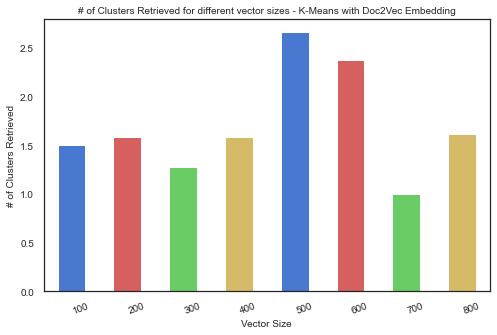

In [83]:
freq_series = pd.Series(y)
my_colors = list(['b', 'r', 'g', 'y'])

# plt.xlabel("Retrieval Method")
# plt.ylabel("mAP Score")
# plt.title("Clustering with BERT embedding v/s BM25")
# plt.show()

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=10)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('figure', titlesize=10)  # fontsize of the figure title

plt.figure(figsize=(8, 5))
ax = freq_series.plot(kind="bar",color =my_colors)
ax.set_title("# of Clusters Retrieved for different vector sizes - K-Means with Doc2Vec Embedding")
ax.set_xlabel("Vector Size")
ax.set_ylabel("# of Clusters Retrieved")
ax.set_xticklabels(x,rotation=20, ha='left')

rects = ax.patches
plt.show()

## MAP Scores

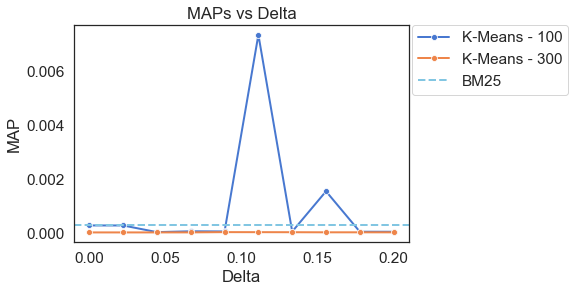

In [16]:

ax = sns.lineplot(data=kmeans2, x='DELTAS', y='MAPS', marker='o', label="K-Means - 100")
# sns.lineplot(data=kmeans3, x='DELTAS', y='MAPS', marker='o', label="K-Means - 300")
# sns.barplot(data=kmeans4, x='DELTAS', y='MAPS', label='Vec Size = 400')
# sns.barplot(data=kmeans5, x='DELTAS', y='MAPS',label='Vec Size = 500')
# sns.barplot(data=kmeans6, x='DELTAS', y='MAPS', label='Vec Size = 600')
# sns.barplot(data=kmeans7, x='DELTAS', y='MAPS', label='Vec Size = 700')
# sns.barplot(data=kmeans8, x='DELTAS', y='MAPS', label='Vec Size = 800')
# plt.axhline(y=0.13578, color='r', linestyle='--', label = 'KMEANS, NO THRSHLD')
# plt.axhline(y=0.0202, color='g', linestyle='--', label = 'DBSCAN, NO THRSHLD')
plt.axhline(y=0.0003, color='c', linestyle='--', label = 'BM25')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
ax.set_xlabel('Delta')
ax.set_ylabel('MAP')
ax.set_title('MAPs vs Delta')
plt.savefig('images/map.png', bbox_inches='tight')

## Recall@100

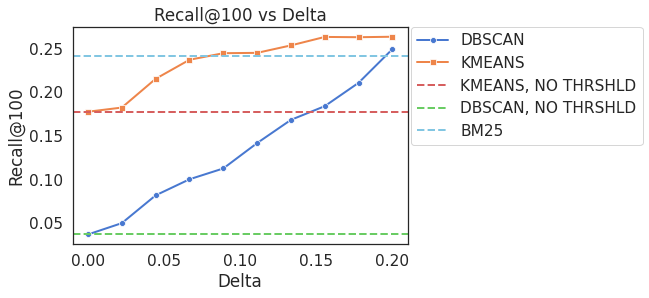

In [114]:
ax = sns.lineplot(data=kmeans, x='DELTAS', y='RECALLS', marker='o', label="K-Means-100")
# ax = sns.lineplot(data=kmeans, x='DELTAS', y='RECALLS', marker='s', label='Vec Size = 100')
# sns.lineplot(data=kmeans2, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 200')
# sns.lineplot(data=kmeans3, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 300')
# sns.lineplot(data=kmeans4, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 400')
# sns.lineplot(data=kmeans5, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 500')
# sns.lineplot(data=kmeans6, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 600')
# sns.lineplot(data=kmeans7, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 700')
# sns.lineplot(data=kmeans8, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 800')
plt.axhline(y=0., color='c', linestyle='--', label = 'BM25')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
ax.set_xlabel('Delta')
ax.set_ylabel('Recall@100')
ax.set_title('Recall@100 vs Delta')
plt.savefig('images/recall.png', bbox_inches='tight')

## Average number of documents retrieved per query

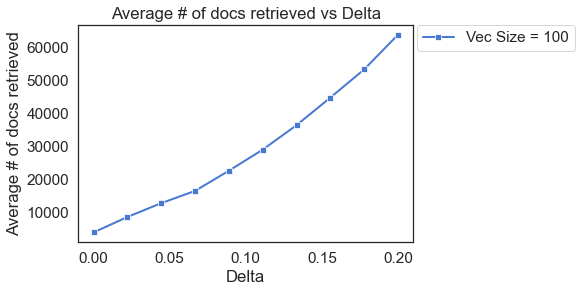

In [19]:
ax = sns.lineplot(data=kmeans2, x='DELTAS', y='NUM_DOCS_RETRIEVED', marker='s', label='Vec Size = 100')
# sns.lineplot(data=kmeans2, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 200')
# sns.lineplot(data=kmeans3, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 300')
# sns.lineplot(data=kmeans4, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 400')
# sns.lineplot(data=kmeans5, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 500')
# sns.lineplot(data=kmeans6, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 600')
# sns.lineplot(data=kmeans7, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 700')
# sns.lineplot(data=kmeans8, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 800')
# plt.axhline(y=108.7, color='r', linestyle='--', label = 'KMEANS, NO THRSHLD')
# plt.axhline(y=132.14, color='g', linestyle='--', label = 'DBSCAN, NO THRSHLD')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
ax.set_xlabel('Delta')
ax.set_ylabel('Average # of docs retrieved')
ax.set_title('Average # of docs retrieved vs Delta')
plt.savefig('images/docs.png', bbox_inches='tight')

## Number of clusters retrieved

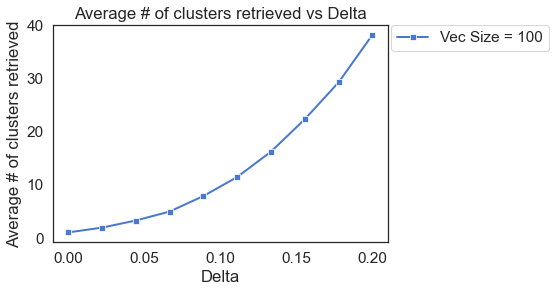

In [20]:
ax = sns.lineplot(data=kmeans2, x='DELTAS', y="CLUSTERS_RETRIEVED", marker='s', label='Vec Size = 100')
# sns.lineplot(data=kmeans2, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 200')
# sns.lineplot(data=kmeans3, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 300')
# sns.lineplot(data=kmeans4, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 400')
# sns.lineplot(data=kmeans5, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 500')
# sns.lineplot(data=kmeans6, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 600')
# sns.lineplot(data=kmeans7, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 700')
# sns.lineplot(data=kmeans8, x='DELTAS', y='MAPS', marker='s', label='Vec Size = 800')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
ax.set_xlabel('Delta')
ax.set_ylabel('Average # of clusters retrieved')
ax.set_title('Average # of clusters retrieved vs Delta')
plt.savefig('images/clusters.png', bbox_inches='tight')

In [1]:
from visualize import plot_MAP_AP

# Actual mAP scores

## BERT

### AP

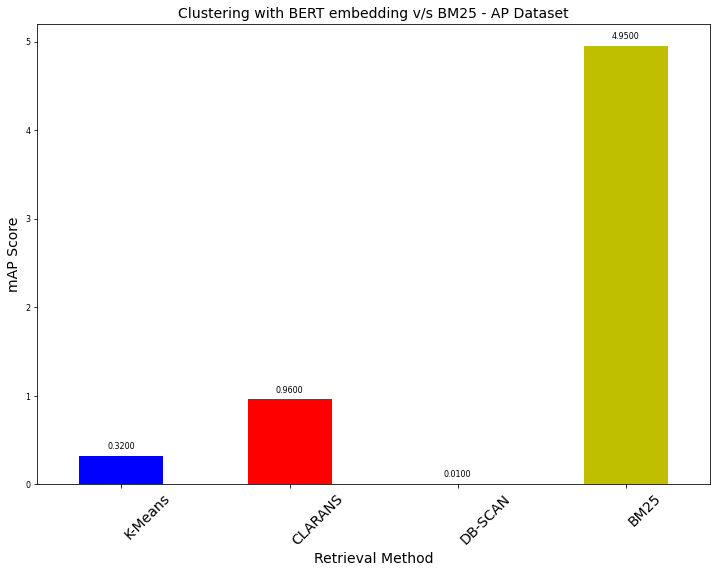

In [2]:
title = "Clustering with BERT embedding v/s BM25 - AP Dataset"
y = [0.32, 0.96, 0.01, 4.95]
plot_MAP_AP(y, title, plot_name="1")

### ZF

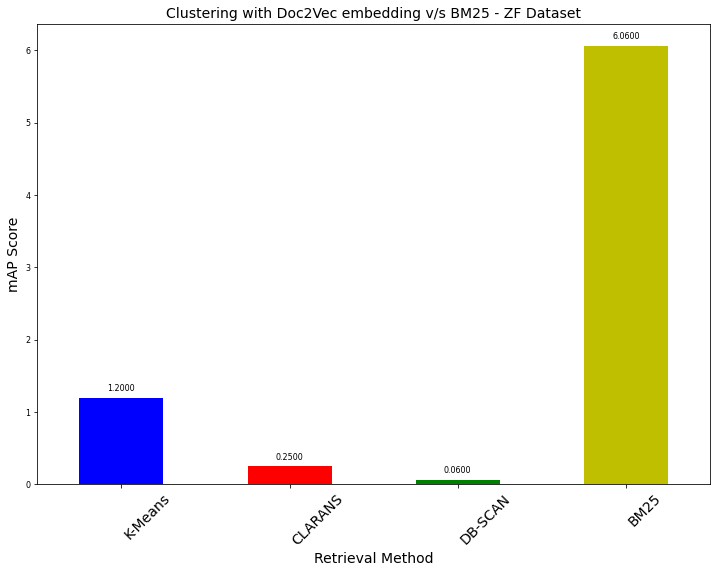

In [3]:
title = "Clustering with Doc2Vec embedding v/s BM25 - ZF Dataset"
y = [1.2, 0.25, 0.06, 6.06]
plot_MAP_AP(y, title, plot_name="2")

## Doc2Vec

### AP

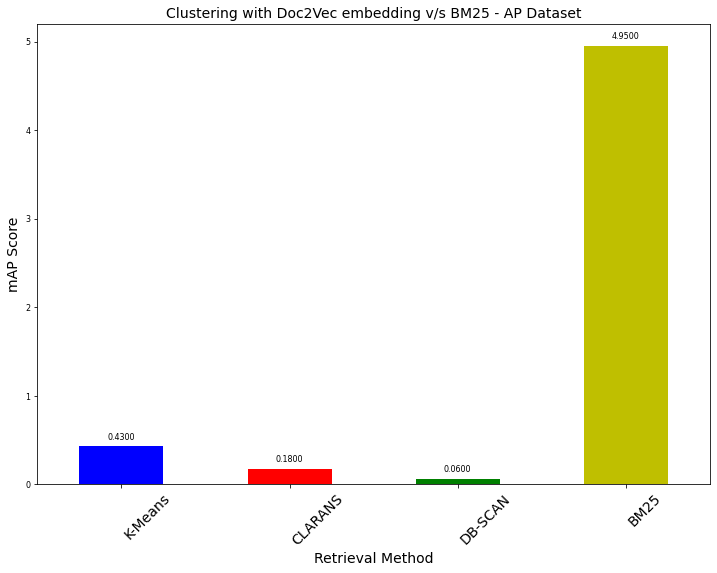

In [4]:
title = "Clustering with Doc2Vec embedding v/s BM25 - AP Dataset"
y = [0.43, 0.18, 0.06, 4.95]
plot_MAP_AP(y, title, plot_name="3")

### ZF

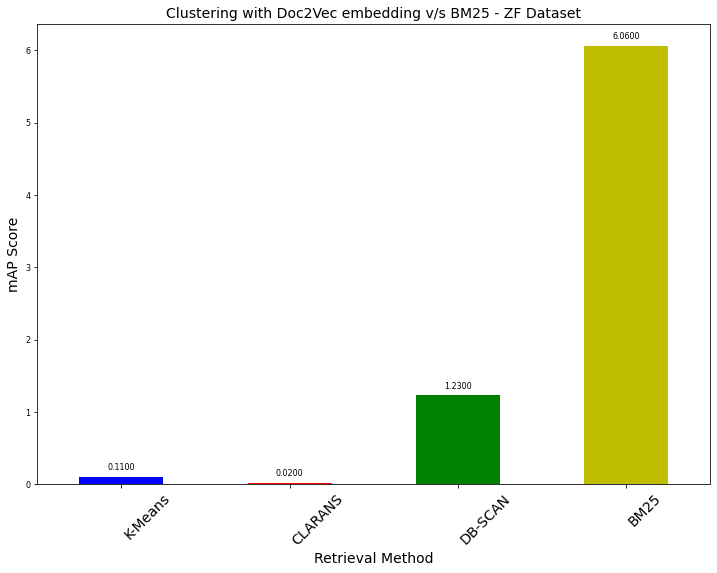

In [5]:
title = "Clustering with Doc2Vec embedding v/s BM25 - ZF Dataset"
y = [0.11, 0.02, 1.23, 6.06]
plot_MAP_AP(y, title, plot_name="4")